# Activity: Run simple linear regression

## **Introduction**


As you're learning, simple linear regression is a way to model the relationship between two variables. By assessing the direction and magnitude of a relationship, data professionals are able to uncover patterns and transform large amounts of data into valuable knowledge. This enables them to make better predictions and decisions. 

In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
import math

The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** This is a fictional dataset that was created for educational purposes and modified for this lab. 

In [2]:
data = pd.read_csv("marketing_sales_data.csv")

In [3]:
data.shape

(572, 5)

In [4]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [5]:
data.shape

(572, 5)

In [6]:
for c in data.columns:
    print(f'{c} has {data[c].isna().sum()} null value(s).')

TV has 1 null value(s).
Radio has 1 null value(s).
Social Media has 0 null value(s).
Influencer has 0 null value(s).
Sales has 1 null value(s).


In [7]:
data.dropna(inplace=True)

## **Step 2: Data exploration** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [8]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            569 non-null    object 
 1   Radio         569 non-null    float64
 2   Social Media  569 non-null    float64
 3   Influencer    569 non-null    object 
 4   Sales         569 non-null    float64
dtypes: float64(3), object(2)
memory usage: 26.7+ KB


In [10]:
data.TV.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [11]:
tv_map = {'Low':0, 'Medium':1, 'High':2}

In [12]:
data.insert(1, 'TVNum', data.TV.map(tv_map))

In [13]:
data.head(1)

,TV,TVNum,Radio,Social Media,Influencer,Sales
0,Low,0,1.218354,1.270444,Micro,90.054222


In [14]:
data.Influencer.unique()

array(['Micro', 'Macro', 'Mega', 'Nano'], dtype=object)

In [15]:
influencer_map = {'Nano':0, 'Micro':1, 'Macro':2, 'Mega':3}

In [16]:
data.insert(5, 'InfluencerNum', data.Influencer.map(influencer_map))

In [17]:
data.head(1)

,TV,TVNum,Radio,Social Media,Influencer,InfluencerNum,Sales
0,Low,0,1.218354,1.270444,Micro,1,90.054222


In [20]:
data.rename(columns={'Social Media':'SocialMedia'}, inplace=True)

In [21]:
data.head(1)

,TV,TVNum,Radio,SocialMedia,Influencer,InfluencerNum,Sales
0,Low,0,1.218354,1.270444,Micro,1,90.054222


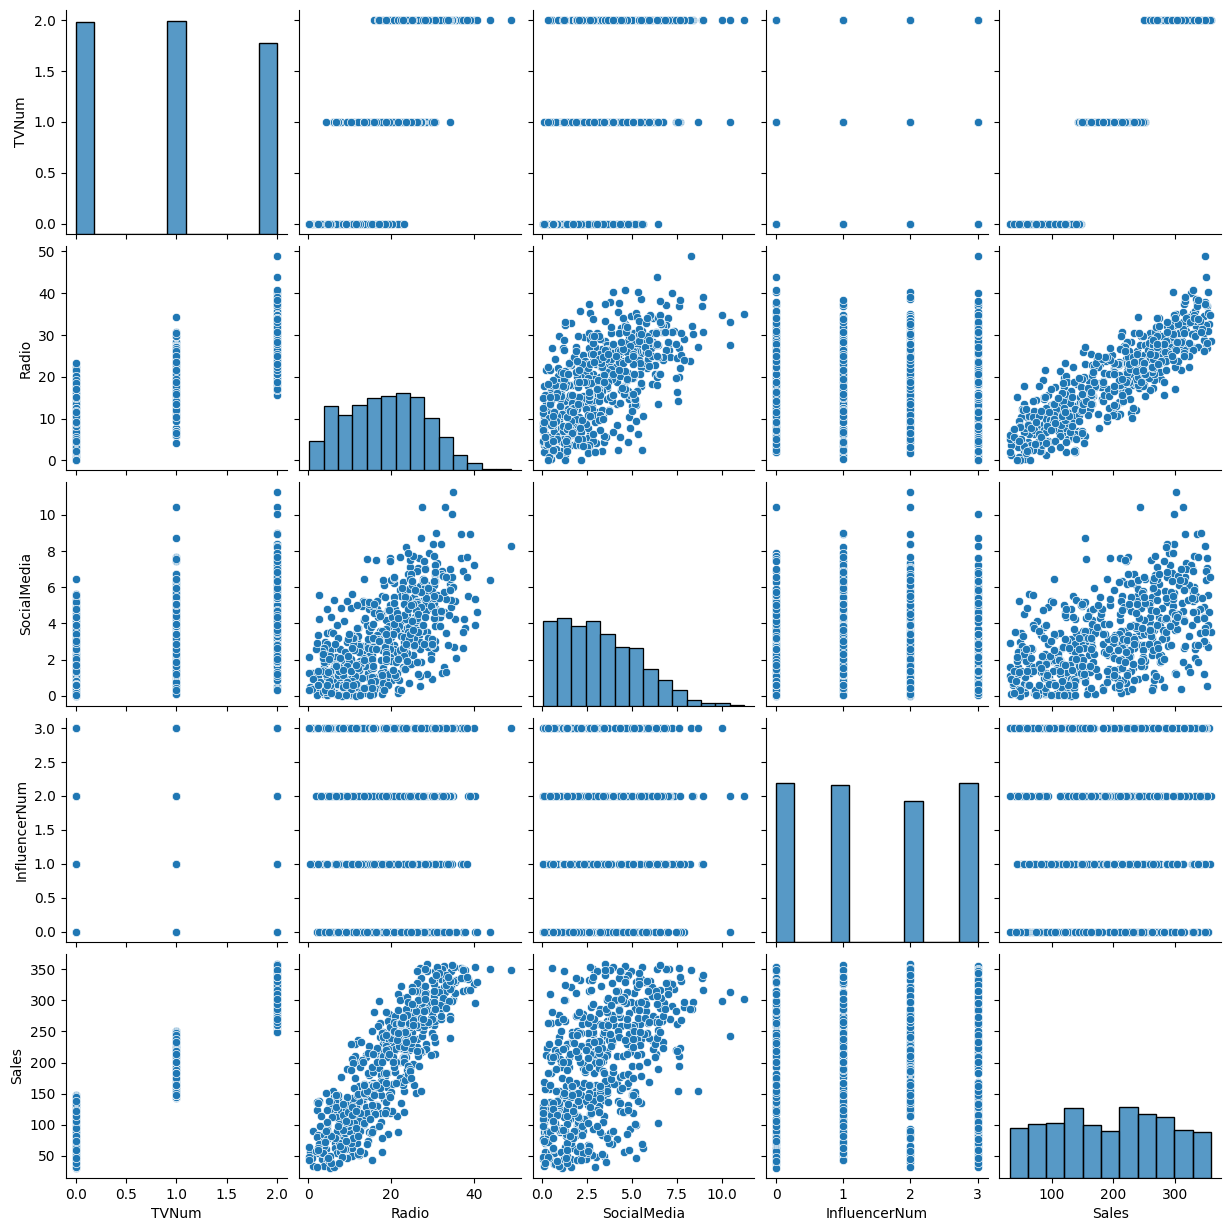

In [24]:
# Create plot of pairwise relationships.
sns.pairplot(data)

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [31]:
dependent_var = 'Sales'
independent_var = 'Radio'

ols_data = data[[independent_var, dependent_var]]
ols_formula = dependent_var + ' ~ ' + independent_var

ols_model = ols(formula=ols_formula, data=ols_data).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Sat, 20 Jul 2024   Prob (F-statistic):          2.07e-176
Time:                        19:08:34   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Radio', ylabel='Sales'>

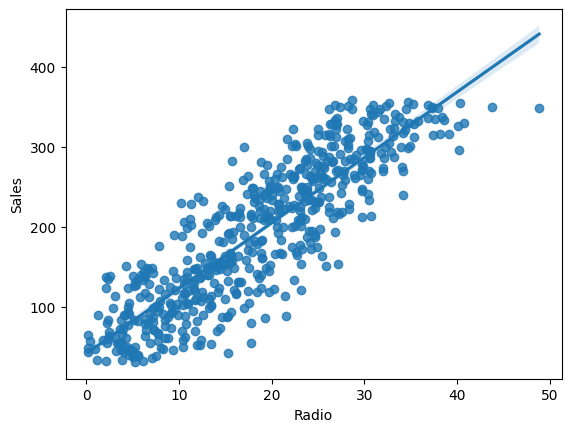

In [32]:
sns.regplot(x=independent_var, y=dependent_var, data = ols_data)

In [34]:
predictions = ols_model.predict(ols_data[independent_var])
residuals = ols_model.resid

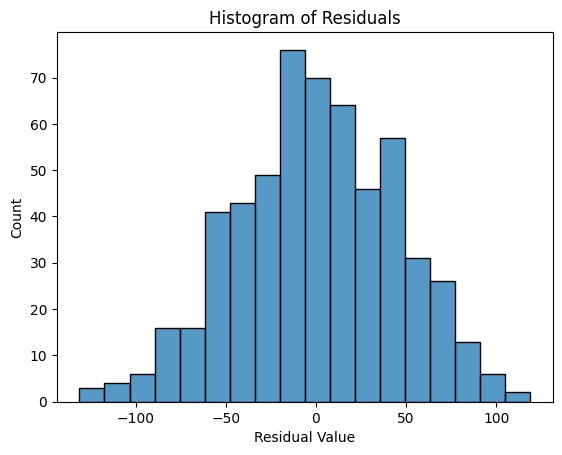

In [35]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

## **Step 4: Results and evaluation** 


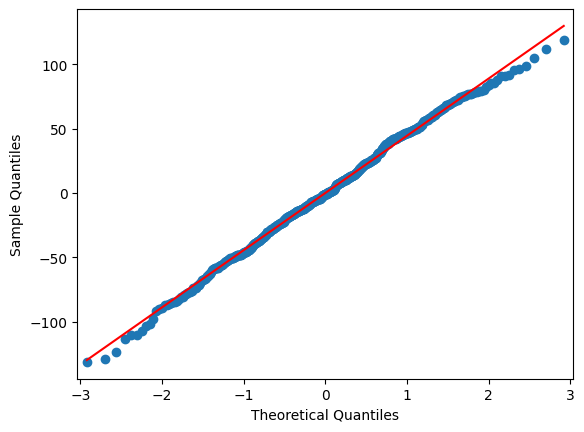

In [36]:
fig = sm.qqplot(residuals, line = 's')
plt.show()

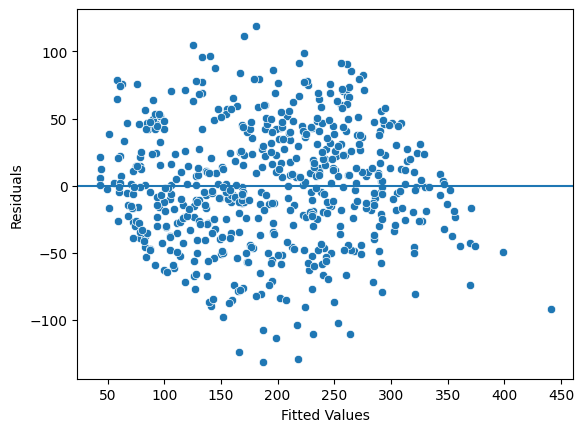

In [37]:
fig = sns.scatterplot(x=predictions, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

## Manual Linear Regression

### Libraries

In [38]:
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression#, Ridge
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Correlation

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TV             569 non-null    object 
 1   TVNum          569 non-null    int64  
 2   Radio          569 non-null    float64
 3   SocialMedia    569 non-null    float64
 4   Influencer     569 non-null    object 
 5   InfluencerNum  569 non-null    int64  
 6   Sales          569 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 35.6+ KB


C:\Users\clse5199\AppData\Local\Temp\ipykernel_5108\663904036.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



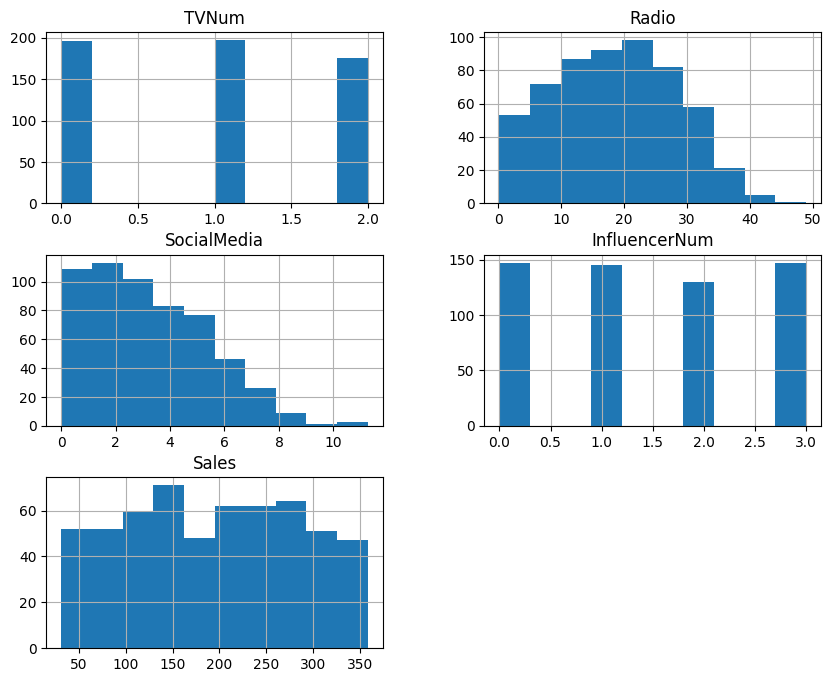

In [76]:
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

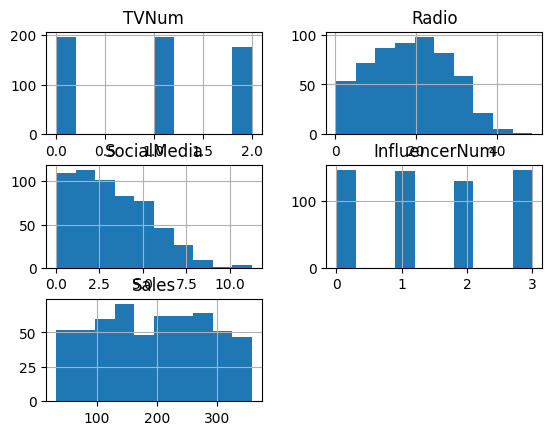

In [72]:
plt.figsize=(15,15)
data.hist(); 
plt.show()

In [43]:
def df_correlation (df_test, types=['int64', 'float64'], percent=65, target=[]):
    list_corr = []
    percent = 10 if percent < 10 else percent
    df_corr = df_test[list(df.select_dtypes(include=types).columns)].corr()
    row_index = 0
    for row in df_corr.iterrows():
        if row[0] in target or len(target) == 0:
            col_index = 0
            for col in df_corr.columns:
                value = df_corr.loc[row[0], col]
                if (value > percent/100 or value < -percent/100) and value != 1.0:
                    if row_index <= col_index or len(target) != 0:
                        sign = '+' if value > 0 else ''
                        pearson_coef, p_value = stats.pearsonr(df[row[0]], df[col])
                        list_corr.append(f'{sign}{100*value:.1f}% {(p_value)}p [{row_index}] {row[0]} to [{col_index}] {col}') # {-math.log10(p_value):.0f}p
                col_index += 1
        row_index += 1  
    return list_corr

In [44]:
df_correlation(data, percent=10, target='Sales')

['+87.0% 2.0698311673754786e-176p [1] Sales to [0] Radio']

### Model

In [48]:
model = LinearRegression()

In [46]:
x_data = data[['Radio']]
y_data = data['Sales']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=25/100)
model.fit(x_train, y_train)
y_hat_test = model.predict(x_test)
r_squared_test = model.score(x_test, y_test)
mse_test = mean_squared_error(y_test, y_hat_test)
print(f'{r_squared_test = :.0%} {mse_test = :.0f}')

r_squared_test = 77% mse_test = 2050


### Plot Prediction and Residuals

In [51]:
sign = '+' if model.intercept_ >= 0 else ''
equation = f'y = {model.coef_[0]:.1f}*x {sign}{model.intercept_:.1f}'
print(equation)

y = 8.0*x +42.7


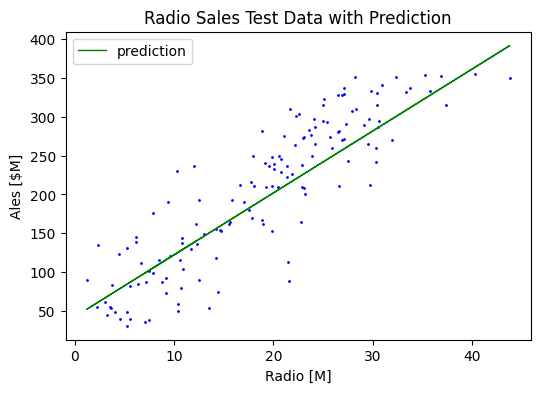

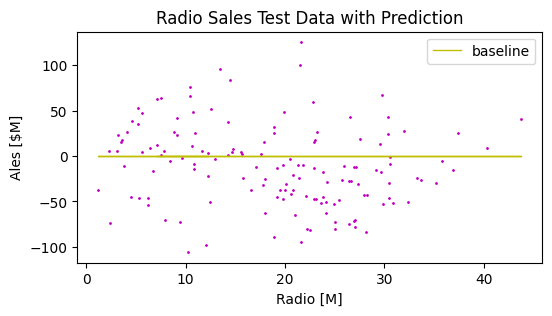

In [54]:
df_test = x_test[:]
df_test.insert(1, 'Sales', y_test)
df_test.insert(2, 'prediction', y_hat_test)
df_test.insert(3, 'residual', (df_test.prediction - df_test.Sales))
df_test.insert(4, 'baseline', df_test.Radio*0)

ax1 = df_test.plot(kind='scatter', x='Radio', y='Sales', figsize=(8,5), style="o", s=1, c='b')
df_test.plot(kind='line', x='Radio', y='prediction', figsize=(6,4), lw=1, style='g-', ax=ax1)
ax1.annotate(equation, xy=(48,6500))
plt.title('Radio Sales Test Data with Prediction')
plt.xlabel('Radio [M]')
plt.ylabel('Ales [$M]')

ax2 = df_test.plot(kind='scatter', x='Radio', y='residual', figsize=(8,5), style="o", s=1, c='m')
df_test.plot(kind='line', x='Radio', y='baseline', figsize=(6,3), lw=1, style='y-', ax=ax2)
plt.title('Radio Sales Test Data with Prediction')
plt.xlabel('Radio [M]')
plt.ylabel('Ales [$M]')
plt.show()

In [55]:
df_test.head(1)

,Radio,Sales,prediction,residual,baseline
67,7.085628,36.56273,99.091381,62.528651,0.0


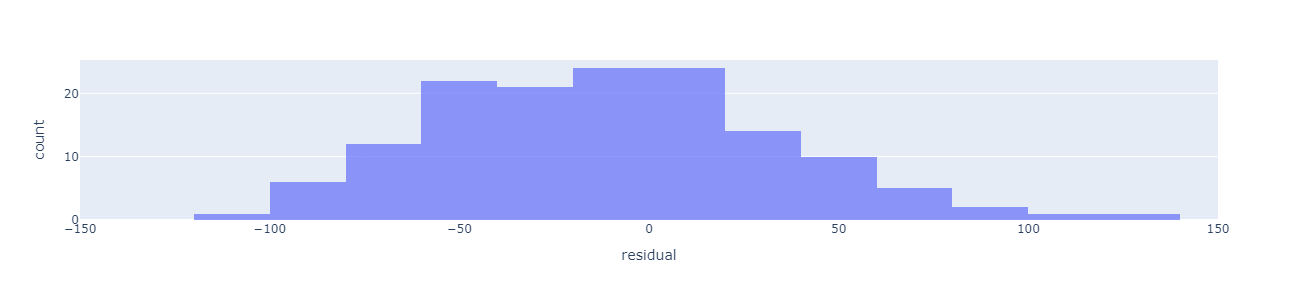

In [65]:
px.histogram(data_frame = df_test[['residual']], x = "residual", 
             range_x=(-150,150), nbins=20, barmode=['group','overlay','relative'][1],
             width=400, height=300, opacity=0.7)

## **Considerations**

## Conclusion

**What are the key takeaways from this lab?**
- Data visualizations and exploratory data analysis can be used to check if linear regression is a well suited approach for modeling the relationship between two variables.
- The results of a linear regression model can be used to express the relationship between two variables. 

**What results can be presented from this lab?**

In the simple linear regression model, the y-intercept is 41.5326 and the slope is 8.1733. 
    One interpretation: If a company has a budget of 1 million dollars more for promoting their products/services on the radio, the company's sales would increase by 8.1733 million dollars on average.
    Another interpretation: Companies with 1 million dollars more in their radio promotion budget accrue 8.1733 million dollars more in sales on average.


The results are statistically significant with a p-value of 0.000, which is a very small value (and smaller than the common significance level of 0.05). This indicates that there is a very low probability of observing data as extreme or more extreme than this dataset when the null hypothesis is true. In this context, the null hypothesis is that there is no relationship between radio promotion budget and sales i.e. the slope is zero, and the alternative hypothesis is that there is a relationship between radio promotion budget and sales i.e. the slope is not zero. So, you could reject the null hypothesis and state that there is a relationship between radio promotion budget and sales for companies in this data.

The slope of the line of best fit that resulted from the regression model is approximate and subject to uncertainty (not the exact value). The 95% confidence interval for the slope is from 7.791 to 8.555. This indicates that there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope. 

**How would you frame your findings to external stakeholders?**

Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services. 